# DL 로지스틱회귀 정리
- toc:true

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 시그모이드

회귀분석과 달리 로지스틱 회귀는 0 또는 1과 같이 분류를 하는 모델임

`-` $x$가 커질수록 $y=1$이 잘나오는 모형은 아래와 같이 설계할 수 있음 

- $y_i \sim Ber(\pi_i),\quad $ where $\pi_i = \frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$

- $\hat{y}_i= \frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}=\frac{1}{1+\exp(-(\hat{w}_0+\hat{w}_1x_i))}$ 

- 베르누이 분포상에 존재한다는 것은 0 또는 1이라는 것

> 로지스틱에서는 loss를 위에 있는 식을 사용해야 함  
우도함수에 의해서 저렇게 되는거 같음... 

In [ ]:
_df = pd.DataFrame({'x':range(-6,7),'y':[0,0,0,0,0,0,1,0,1,1,1,1,1]})

In [ ]:
xx = torch.linspace(-6,6,100)
def f(x):
    return torch.exp(x)/(1+torch.exp(x))

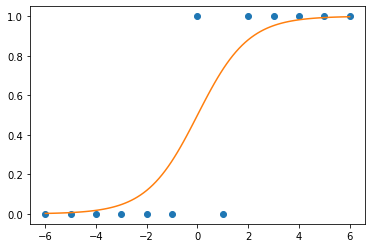

In [ ]:
plt.plot(_df.x,_df.y,'o')
plt.plot(xx,f(xx))

In [ ]:
x = torch.linspace(-1,1,2000).reshape(2000,1) # -1에서 1사이의 값 2천개 준비
# net 학습을 통해서 아래에 있는 w0(= -1)과 w1(= 5)을 맞춰야 함
w0 = - 1 
w1 = 5 
u = w0+x*w1 
v = torch.exp(u)/(1+torch.exp(u)) # v=πi, 즉 확률을 의미함 -> 0 ~ 1사이에 값이 존재 # 시그모이드
y = torch.bernoulli(v) # 0.5이하의 값은 0으로, 0.5 초과하는값은 1로 치환 # y는 정답

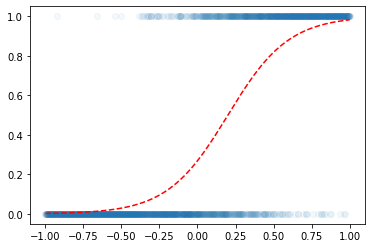

In [ ]:
plt.scatter(x,y,alpha=0.05)
plt.plot(x,v,'--r')

## BCELoss
- $loss= - \sum_{i=1}^{n} \big(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\big)$ 

- 회귀에서는 MSE를 사용하여 loss를 계산하였지만 이진분류에서는 BCELoss를 사용하여 loss를 계산한다.

BCELoss는 정답이 0일때와 정답이 1일때의 경우를 나눠서 loss계산한다. (위의 수식 확인)

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(1, 1),
    torch.nn.Sigmoid()
)

loss_fn = torch.nn.BCELoss()

optim = torch.optim.SGD(net.parameters(), lr = 0.05)

for epoc in range(3000): 
    ## 1 
    yhat= net(x) 
    ## 2 
    loss = loss_fn(yhat, y)
    ## 3 
    loss.backward() 
    ## 4 
    optim.step()
    optim.zero_grad()

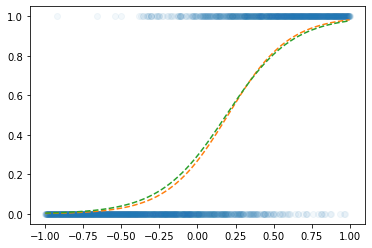

In [ ]:
plt.plot(x,y,'o',alpha=0.05)
plt.plot(x,v,'--')
plt.plot(x,net(x).data,'--')

In [ ]:
net[0].weight, net[0].bias # 학습을 할수록 weight는 5에 가까워지고 bias는 -1에 가까워짐

(Parameter containing:
 tensor([[4.6119]], requires_grad=True), Parameter containing:
 tensor([-0.8733], requires_grad=True))

## 로지스틱의 한계
아래와 같은 underlying을 갖는 곡선은 로지스틱 회귀로 적합시키는 것이 어려움

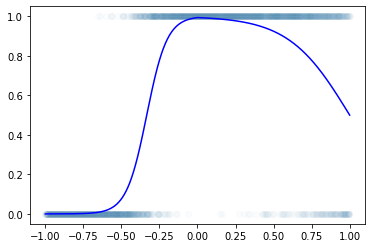

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-10-04-dnnex0.csv')
plt.plot(df.x,df.y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')

In [ ]:
x= torch.tensor(df.x).float().reshape(-1,1)
y= torch.tensor(df.y).float().reshape(-1,1)

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(1,1),
    torch.nn.Sigmoid()
)

loss_fn = torch.nn.BCELoss() 

optimizr = torch.optim.Adam(net.parameters()) 

In [ ]:
for epoc in range(6000):
    ## 1 
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad() 

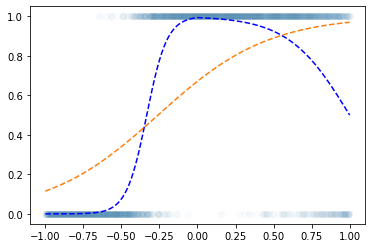

In [ ]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'--b')
plt.plot(x,net(x).data,'--')

아무리 많이 돌려도 위와 같이 증가하다가 감소하는 underlying은 표현이 안됨 $\to$ DNN등장